### Hello

Commence ici, la variable *cipher_message* contient la totalité du text chiffré.

Le reste, je te laisse le chercher ;)

In [623]:
with open('./riddle_cipher.txt', 'r') as file:
    cipher_message = file.read()

print(cipher_message)

J ejxhw wpiakr yzd iwepwwp xakhhyerwp,
Mzk, rwh ze ypraw wchykayer hy ezkr,
Yp lwcokttaw qje wekgqw ryer yalwerw,
Vw rw pyhzw, j gwekw pyep iyawkh !

Rje wpiakr, rwh ze tke qwcyekpqw l'ojahjgwakw,
P'wpr ghkppw lyep hwp lwlyhwp lw qy iajpw,
Cjqqw zew chw iawckwzpw, j qwauwkhhwzpw qygkw,
Rz yp lwujkhw qwp qfprwawp, j qy xwhhw ajpw !

Rje lkihjqw l'kegwekwzaw wpr hy iawzuw wchyryerw,
Lw rje pyujka, lw rje wpiakr cjemzwayer,
Qykp ry pjkt lw cjeeykppyecw ew cjeeykr ijker lw hkqkrw,
Cya rwp ojaknjep p'wrwelwer xkwe yz-lwhy lwp pfprwqwp xkeykawp.

Mzw rwp iyp rw qwewer uwap lwp cjerawwp ejzuwhhwp,
Jz hwp cokttawp pw qyakwer yzd qjrp hwp ihzp xwyzd,
Hy jz hwp wmzyrkjep lyepwer yuwc hwp akqwp,
Wr hwp yhgjakroqwp pw cjetjelwer yuwc hwp wcojp.

Mzw hwp ijwqwp thwzakppwer pjzp ry ihzqw oyxkhw,
Mzw rje gwekw p'wiyejzkppw lyep h'yar pzxrkh,
Cya rz wp h'kegwekwzaw lwp qjrp, hy qzpw lwp wpiakrp,
Wr ry mzwrw lw pyujka wpr ze rawpja ketkek.

Twhkckryrkjep, j wpiakr wchykaw,
Rjk mzk yp awhwuw hw lwtk lw 

In [624]:
import numpy as np
import string
import matplotlib.pyplot as plt

# First try

In [625]:
# Function that counts the number of occurence of a given letter in a string
def count_letter_freq(str):
    freq = {}
    for letter in str:
        keys = freq.keys()
        if letter in keys:
            freq[letter] += 1
        else:
            freq[letter] = 1
    
    return freq

# Create a dictionary with letter frequency in the cipher
cipher_letter_freq = count_letter_freq(cipher_message.lower())

In [626]:
# Create a dictionary with letter frequency in french
french_letter_freq = {'a': 9.42, 'b': 1.02, 'c': 2.64, 'd': 3.39, 'e': 15.87, 'f': 0.95, 'g': 1.04, 'h': 0.77, 'i': 8.41, 'j': 0.89, 'k': 0.00, 'l': 5.34, 'm': 3.24, 
                      'n': 7.15, 'o': 5.14, 'p': 2.86, 'q': 1.06, 'r': 6.46, 's': 7.90, 't': 7.26, 'u': 6.24, 'v': 2.15, 'w': 0.00, 'x': 0.30, 'y': 0.24, 'z': 0.32} 

In [627]:
# Sort the dictionary by frequency
sorted_french_letters = dict(sorted(french_letter_freq.items(), key=lambda x:x[1], reverse=True))
sorted_cipher_letters = dict(sorted(cipher_letter_freq.items(), key=lambda x:x[1], reverse=True))

# Delete special character in the cipher letter dictionary
del sorted_cipher_letters['\n']
del sorted_cipher_letters[' ']
del sorted_cipher_letters['-']
del sorted_cipher_letters[',']
del sorted_cipher_letters['.']
del sorted_cipher_letters['!']
del sorted_cipher_letters['\'']

print(sorted_french_letters)
print(sorted_cipher_letters)

{'e': 15.87, 'a': 9.42, 'i': 8.41, 's': 7.9, 't': 7.26, 'n': 7.15, 'r': 6.46, 'u': 6.24, 'l': 5.34, 'o': 5.14, 'd': 3.39, 'm': 3.24, 'p': 2.86, 'c': 2.64, 'v': 2.15, 'q': 1.06, 'g': 1.04, 'b': 1.02, 'f': 0.95, 'j': 0.89, 'h': 0.77, 'z': 0.32, 'x': 0.3, 'y': 0.24, 'k': 0.0, 'w': 0.0}
{'w': 289, 'p': 147, 'e': 127, 'r': 121, 'k': 117, 'y': 90, 'j': 88, 'h': 82, 'a': 81, 'z': 79, 'l': 45, 'q': 42, 'c': 41, 'i': 30, 'u': 24, 't': 22, 'm': 17, 'o': 16, 'g': 15, 'x': 13, 'd': 8, 'f': 4, 'n': 2, 'v': 1}


In [628]:
# Get the ordered letters of french language and cipher
sorted_french_letters_list = list(sorted_french_letters.keys())
sorted_cipher_letters_list = list(sorted_cipher_letters.keys())

# Create the secret dictionary
secret_dict = {}
for k in range(len(sorted_cipher_letters_list)):

    cipher_letter = sorted_cipher_letters_list[k]
    french_letter = sorted_french_letters_list[k]

    secret_dict[cipher_letter] = french_letter

secret_dict

{'w': 'e',
 'p': 'a',
 'e': 'i',
 'r': 's',
 'k': 't',
 'y': 'n',
 'j': 'r',
 'h': 'u',
 'a': 'l',
 'z': 'o',
 'l': 'd',
 'q': 'm',
 'c': 'p',
 'i': 'c',
 'u': 'v',
 't': 'q',
 'm': 'g',
 'o': 'b',
 'g': 'f',
 'x': 'j',
 'd': 'h',
 'f': 'z',
 'n': 'x',
 'v': 'y'}

In [629]:
# Replace letters in the cipher by corresponding letter in the secret dictionary
def decrypt(cipher, dict):
    translation_table = str.maketrans(dict)
    return cipher.translate(translation_table)

    
decrypted_message = decrypt(cipher_message.lower(), secret_dict)
print(decrypted_message)

r irjue eaclts noh ceiaeea jltuunisea,
got, seu oi nasle epuntlnis un iots,
na depbtqqle mri eitfme snis nldeise,
ye se anuoe, r feite ania cnletu !

sri eaclts, seu oi qti mepnitame d'brlurfelte,
a'eas futaae dnia uea dednuea de mn clrae,
prmme oie pue clepteoae, r melvetuueoae mnfte,
so na devrtue mea mzaselea, r mn jeuue lrae !

sri dtcurme d'tifeiteole eas un cleove epunsnise,
de sri anvrtl, de sri eaclts prigoelnis,
mnta sn artq de priintaanipe ie priints crtis de utmtse,
pnl sea brltxria a'eseideis jtei no-deun dea azasemea jtintlea.

goe sea cna se meieis vela dea prisleea iroveuuea,
ro uea pbtqqlea ae mnlteis noh mrsa uea cuoa jenoh,
un ro uea egonstria dniaeis nvep uea ltmea,
es uea nufrltsbmea ae priqrideis nvep uea epbra.

goe uea cremea queoltaaeis aroa sn cuome bnjtue,
goe sri feite a'ecnirotaae dnia u'nls aojstu,
pnl so ea u'tifeiteole dea mrsa, un moae dea eacltsa,
es sn goese de anvrtl eas oi slearl tiqtit.

qeutptsnstria, r eaclts epuntle,
srt got na leueve ue deqt de 

# Second try
Sa race, j'ai vraiment trop de temps à perdre

In [630]:
# Rotating letters as in Cesar cipher
def rotate_letters(n, crypted_message):

    alphabet = list(string.ascii_lowercase)

    secret_dict = {}
    for k in range(len(alphabet)):

        cipher_letter = alphabet[k]
        decrypted_letter = alphabet[np.mod(k+n, len(alphabet))]

        secret_dict[cipher_letter] = decrypted_letter

    translation_table = str.maketrans(secret_dict)
    return cipher_message.lower().translate(translation_table)


decrypted_message = rotate_letters(8, cipher_message)
print(decrypted_message)
    

r mrfpe exqisz ghl qemxeex fisppgmzex,
uhs, zep hm gxzie ekpgsigmz pg mhsz,
gx tekwsbbie yrm emsoye zgmz gitemze,
de ze xgphe, r oemse xgmx qgiesp !

zrm exqisz, zep hm bsm yekgmsxye t'wriproeise,
x'exz opsxxe tgmx pex tetgpex te yg qirxe,
kryye hme kpe qieksehxe, r yeicesppehxe ygose,
zh gx tecrspe yex ynxzeiex, r yg feppe irxe !

zrm tsqprye t'smoemsehie exz pg qiehce ekpgzgmze,
te zrm xgcrsi, te zrm exqisz krmuheigmz,
ygsx zg xrsb te krmmgsxxgmke me krmmgsz qrsmz te psysze,
kgi zex wrisvrmx x'ezemtemz fsem gh-tepg tex xnxzeyex fsmgsiex.

uhe zex qgx ze yememz ceix tex krmzieex mrhceppex,
rh pex kwsbbiex xe ygisemz ghl yrzx pex qphx feghl,
pg rh pex euhgzsrmx tgmxemz gcek pex isyex,
ez pex gporiszwyex xe krmbrmtemz gcek pex ekwrx.

uhe pex qreyex bpehisxxemz xrhx zg qphye wgfspe,
uhe zrm oemse x'eqgmrhsxxe tgmx p'giz xhfzsp,
kgi zh ex p'smoemsehie tex yrzx, pg yhxe tex exqiszx,
ez zg uheze te xgcrsi exz hm ziexri smbsms.

bepskszgzsrmx, r exqisz ekpgsie,
zrs uhs gx iepece pe tebs te 

# Third try 
Gros tu casse les burnes ça fait 1h30 que j'y suis. Bon j'ai capté qu'il y avais une clé... dernier essai

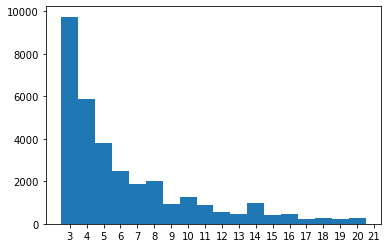

In [631]:
# Find similar words in the cipher
def find_duplicated_words(str):
    words = str.split()
    counts = {}
    
    for word in words:
        keys = counts.keys()
        if word in keys:
            counts[word] += 1
        else:
            counts[word] = 1

        duplicated_words = {key: value for key, value in counts.items() if value > 1}

    return list(duplicated_words)

# Find all the positions of a given word in the string
def find_all(str, sub):
    return [i for i in range(len(str)) if str.startswith(sub, i)]

# Find common denominator
def find_common_denom(str, words, min=1, max=20):

    if False:
        str = str.replace(" ","")
        str = str.replace("!","")
        str = str.replace(",","")
        str = str.replace(".","")
        str = str.replace("\'","")
        str = str.replace("\n","")

    indexes = []
    denom = []

    for word in words:
        indexes += find_all(str, word)

    for i in range(len(indexes)-1):
        for j in np.arange(i, len(indexes)):
            denom += [np.gcd(indexes[i], indexes[j])]   
    

    denom = [x for x in denom if x <= max and x >= min]

    bins = np.arange(min, np.max(denom) + 1.5) -0.5

    fig, ax = plt.subplots()
    _ = ax.hist(denom, bins)
    ax.set_xticks(bins + 0.5)
    
duplicated_words = find_duplicated_words(cipher_message.lower())

find_common_denom(cipher_message.lower(), duplicated_words, min=3, max=20)

# Forth and final try
Okey fuck j'étais parti juste... Fallais juste réordonner quelques lettre encore...

In [632]:
# Function to swap multiple letters in the dictionary
def swap_letters(old_value, new_value, dict):

    if len(old_value) != len(new_value):
        print('The two strings should have the same length')
        return

    for k in range(len(old_value)):
        for key, value in dict.items():
            if value == old_value[k]:
                dict[key] = new_value[k]

            elif value == new_value[k]:
                dict[key] = old_value[k]

    return dict

# Init a new array for modification
secret_dict_modif = secret_dict.copy()
secret_dict_modif = swap_letters('rijuacutahggjyz', 'onblspritxqfhjy', secret_dict_modif)


decrypted_message = decrypt(cipher_message.lower(), secret_dict_modif)
print(decrypted_message)

o noble esprit aux pensees brillantes,
qui, tel un astre eclairant la nuit,
as dechiffre mon enigme tant ardente,
je te salue, o genie sans pareil !

ton esprit, tel un fin mecanisme d'horlogerie,
s'est glisse dans les dedales de ma prose,
comme une cle precieuse, o merveilleuse magie,
tu as devoile mes mysteres, o ma belle rose !

ton diplome d'ingenieure est la preuve eclatante,
de ton savoir, de ton esprit conquerant,
mais ta soif de connaissance ne connait point de limite,
car tes horizons s'etendent bien au-dela des systemes binaires.

que tes pas te menent vers des contrees nouvelles,
ou les chiffres se marient aux mots les plus beaux,
la ou les equations dansent avec les rimes,
et les algorithmes se confondent avec les echos.

que les poemes fleurissent sous ta plume habile,
que ton genie s'epanouisse dans l'art subtil,
car tu es l'ingenieure des mots, la muse des esprits,
et ta quete de savoir est un tresor infini.

felicitations, o esprit eclaire,
toi qui as releve le defi de 

# Conclusion
J'ai la petite larme à l'oeil, presque plus pour la beauté du poème que d'être arrivé à la fin de ce problème de mes deux. En vrai, t'as une belle plume, Cléo va adoré !